#Numerical Homework 2

##Objectives
1. Plot a Brillouin function out and notice that it's linear with small ```x```.
2. Calculate a spontaneous magnetization by use of Weiss model.
3. Analyze the  Larmor precession and get a grimpse of Landau–Lifshitz–Gilbert equaation.
4. Learn about solving differential and non-linear equations numerically.
5. Learn more about 3D plotting.

In [3]:
#first import all necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from scipy.integrate import odeint

In [4]:
def BJ(x,J):
    f1 = (2*J+1)/(2*J)
    f2 = 1/(2*J)
    return f1*(np.cosh(f1*x)/np.sinh(f1*x))-f2*(np.cosh(f2*x)/np.sinh(f2*x))

def functionToSolve(x):
    return BJ(x,J)-(J+1)*T*x/(3*J)

##Program Explaination

Her we define a Brillouin function $B_J(x,J)$, and the equation to be solved $B_J = \frac{(J+1) T x}{3 J}$ 

#Brillouin function for Paramagnetism

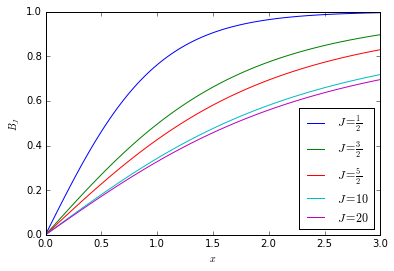

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0.001, 3, 100)
ax.plot(x,BJ(x,1.0/2),label=r"$J=\frac{1}{2}$")
ax.plot(x,BJ(x,3.0/2),label=r"$J=\frac{3}{2}$")
ax.plot(x,BJ(x,5.0/2),label=r"$J=\frac{5}{2}$")
ax.plot(x,BJ(x,10.0),label=r"$J=10$")
ax.plot(x,BJ(x,20.0),label=r"$J=20$")


ax.set_ylabel('$B_J$')
ax.set_xlabel('$x$')
plt.legend(loc='lower right')
plt.show()
# plt.savefig('BJ_vs_x.pdf')

#Weiss Model of Ferromagnetism

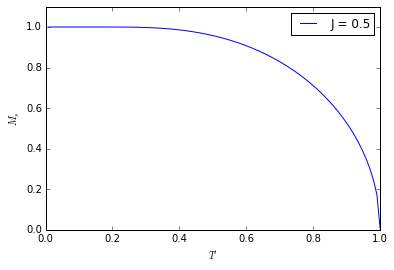

In [6]:
J = 1./2

Tarray = np.linspace(0.01,1,100)
guess = 30.0
M = []

for T in Tarray:
    x0 = fsolve(functionToSolve,guess)
    guess = x0
    M.append(BJ(x0,J))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Tarray,M,label="J = " + str(J))
ax.set_ylim([0,1.1])
plt.legend(loc='best')
ax.set_ylabel('$M_s$')
ax.set_xlabel('$T\'$')
# plt.show()
plt.savefig('M_vs_T.pdf')

##Program Explaination
Here we use a funciton ```fsolve``` to find the solution $x0$ where $f(x0) = 0$.  We have to rearrange our equation to make it zero in one side ```BJ(x0,J)-(J+1)*T*x0/(3*J) = 0``` and call it ```functionToSolve(x)```. We do this for different temperature points T.

##Homework (15 points)
1. (3 points) Which line of code controls the denstiy and plot range? Make a plot such that it contains 100 pints and run a calculation from T= 0 to 1.5. Submit a figure with a title as yourname and student ID.
2. (2 points) Why do we need to have a line ```guess = x0```?
3. **(Challanging: 10 points)** Repeat a simulation for J = 0.5, 1.5, 2.5, 5.5 and k, where k is the combination from all digits of your student id (e.g. if Id is 4505123, k =4+5+5+1+2+3=20)

**Hint** Construct another ```for``` loop above the existing one. Define a new list of J called ```Jlist = [0.5, 1.5, 2.5, 5.5,k] ``` and use ```for J in Jlist:``` You have to be careful about the indentation. 

You might want to consult google like "python loop within loop".


#Magnetization Dynamics 

In [7]:
def dm_dt(m,t):
    dmx_dt = -m[1]-damping*m[0]*m[2]
    dmy_dt = m[0]-damping*m[1]*m[2]
    dmz_dt = damping*(m[0]**2+m[1]**2)
    return [dmx_dt, dmy_dt, dmz_dt]

##Program Explaination

Her we define the system of differeitial equations in the form of

$\frac{dm_x}{dt} = f_x(m_x,m_y,m_z) $ 
$\frac{dm_y}{dt} = f_y(m_x,m_y,m_z) $ 
$\frac{dm_z}{dt} = f_z(m_x,m_y,m_z) $ 

and return the left-hand side.

##1. Lamour Precession

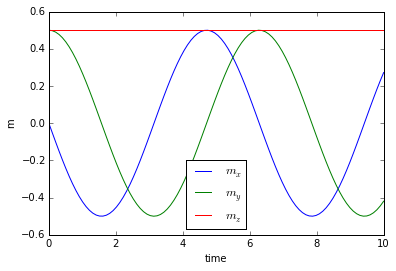

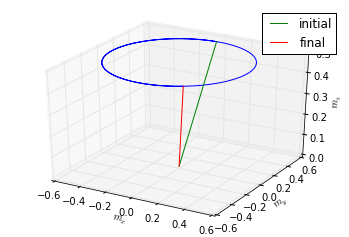

In [14]:
damping = 0 #no damping 

m0 = [0, 0.5, 0.5]  #initial magnetization direction      
t  = np.linspace(0, 10, 100)   #Sampling the time from 0 to 10 in 100 steps

m = odeint(dm_dt, m0, t) #solve the equation
mx = m[:, 0] #extract the result
my = m[:, 1]
mz = m[:, 2]

#plot 2d graph
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, mx,label="$m_x$") 
ax.plot(t, my,label="$m_y$")
ax.plot(t, mz,label="$m_z$")
ax.set_ylabel('m')
ax.set_xlabel('time')
plt.legend(loc='best')
plt.show()

#plot trajectory in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(mx,my,mz) #plot the entire trajectory
ax.plot([0,mx[0]],[0,my[0]],[0,mz[0]],label='initial') #plot initial magnetization vector
ax.plot([0,mx[-1]],[0,my[-1]],[0,mz[-1]],label='final') #plot final magnetization vector
plt.legend(loc='best')
ax.set_xlabel('$m_x$')
ax.set_ylabel('$m_y$')
ax.set_zlabel('$m_z$')
plt.show()

##Program Explaination 
1. By setting ```damping = 0``` the LLG equation will be reduced to a simple Larmour precession.

2. Here we use a funciton ```odeint``` to solve the system of ordinary equation. We have to write the ODE in the form of $\frac{d \vec{m}}{dt} = f_1 \hat{i} + f_2 \hat{j} + f_3 \hat{k}$  or
    
    $ \frac{dm_x}{dt} = f_1 $

    $ \frac{dm_x}{dt} = f_2 $

    $ \frac{dm_x}{dt} = f_3. $

    And then derine a function that return a list ```[f1, f2, f3]```.

    By calling ```odeint(dm_dt, m0, t)```. We need to proved this function, an intital condition  ```m0```, and the time steps ```t```.

3. After that I have made a plot and also a 3d plot of the trajectory.  ```ax.plot([0,mx[0]],[0,my[0]],[0,mz[0]],label='initial')``` displays the intial position of the magnetization vector.  It works because the Python creates a line from ```(0,0,0)``` to ```(mx[0],my[0],mz[0])```. 

4. In Python, the index ```0``` means the first point in the array; while ```-1``` gives you the last element. For example 

    ``` days = ['Monday','Tuesday','Wednesday','Thursday','Friday']```
    
    ```days[1] ``` is `Monday` while ```days[-1] ``` is `Friday`
 






##2. Landau-Lifshitz-Gilbert Equation

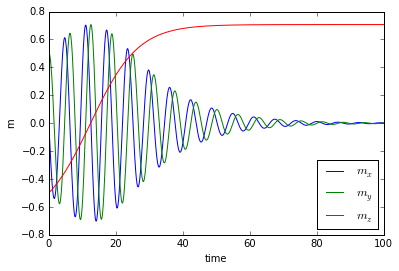

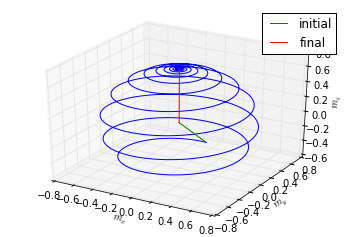

In [17]:
damping = 0.1

m0 = [0, 0.5, -0.5]       
t  = np.linspace(0, 100, 1000)  

m = odeint(dm_dt, m0, t)
mx = m[:, 0]
my = m[:, 1]
mz = m[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, mx,label="$m_x$")
ax.plot(t, my,label="$m_y$")
ax.plot(t, mz,label="$m_z$")
ax.set_ylabel('m')
ax.set_xlabel('time')
plt.legend(loc='best')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(mx,my,mz)
ax.plot([0,mx[0]],[0,my[0]],[0,mz[0]],label='initial')
ax.plot([0,mx[-1]],[0,my[-1]],[0,mz[-1]],label='final')
plt.legend(loc='best')
ax.set_xlabel('$m_x$')
ax.set_ylabel('$m_y$')
ax.set_zlabel('$m_z$')
plt.show()

##Program Explaination
The program is the same by set dampling to non-zero nmber

##Homework (15 points)
1. (5 points) Why the simulation fails when setting  m0 = [0,0,-1] i.e. the initial vector is vertically down.
2. (5 points) Show that we can simulate the swiching from m = [0,0,-1] to m = [0,0,1]  by adding a small off-axis component to x or y to the initial magnetization like m0=[0, 0.0001, -1]. Submit a figure with a title as yourname and student ID that show this complete switching. 
3. (5 points) Play with the code. Find out what parameter control the stwiching time? 
